y size = 150 2


<ipython-input-5-76438fea4e4b>:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-matrix))


w  [[159.07115753]
 [ 81.34084097]]
Train accuracy: 100.0 %
343


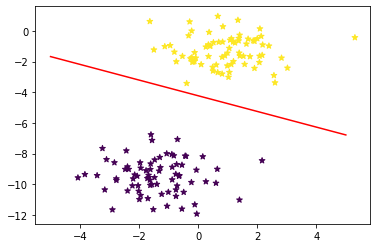

In [5]:
#from sklearn.datasets import make_classification

# X, y = make_classification(
#     n_features=2,
#     n_classes=2,
#     n_samples=200,
#     n_redundant=0,
#     n_clusters_per_class=1
# )

from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def normalize_data(data: np.ndarray,
                   mean: np.ndarray = None,
                   std: np.ndarray = None) -> (np.ndarray, np.ndarray, np.ndarray):
    """
    :param data: (num_examples, num_features) Data matrix
    :param mean: (num_features, 1)  Data mean
    :param std: (num_features, 1) Data standard deviation
    :return normalized_data: (num_examples, num_features) Normalized data matrix
    :return mean: (num_features, 1) Mean used for normalizing
    :return std: (num_features, 1) Standard deviation used for normalizing
    """

    if mean is None:
        mean = data.mean(axis=0).reshape((-1, 1))

    if std is None:
        std = data.std(axis=0).reshape((-1, 1))

    normalized_data = data - np.repeat(mean.T, repeats=data.shape[0], axis=0)
    normalized_data = normalized_data / np.repeat(std.T, repeats=data.shape[0], axis=0)
    return normalized_data, mean, std

def sigmoid(matrix: np.ndarray) -> np.ndarray:
    """
    :param matrix: Matrix on which sigmoid must be applied
    :return sigmoid_mat: Sigmoid applied on matrix entry-wise
    """
    # here matrix = w_transpose * x
    return 1 / (1 + np.exp(-matrix))


def predict(data: np.ndarray,
            weights: np.ndarray,
            bias: float) -> np.ndarray:
    """
    :param data: (num_examples, num_features) Data matrix
    :param weights: (num_features, 1) Weight vector
    :param bias: Scalar bias
    :return predictions: (num_examples, 1) Predicted target values
    """
    predictions = sigmoid(np.matmul(data, weights) + bias)
    for i in range(data.shape[0]):
            if(predictions[i] >= 0.5):
                predictions[i] = 1
            else:
                predictions[i] = -1  
#     predictions = (np.matmul(data, weights) + bias)
#     for i in range(data.shape[0]):
#             if(predictions[i] >= 0):
#                 predictions[i] = 1
#             else:
#                 predictions[i] = -1

                
    return predictions


def accuracy(targets: np.ndarray,
             predictions: np.ndarray) -> float:
    """
    :param targets: (num_examples, 1) Target labels
    :param predictions: (num_examples, 1) Predicted labels
    :return accuracy: Computed accuracy
    """
    count = 0
    for i in range(targets.shape[0]):
        #print("result" , targets[i] , predictions[i])
        if(targets[i] == predictions[i]):
            count += 1
    #print("count " , count)    
    return count/targets.shape[0]


def train(data: np.ndarray,
          targets: np.ndarray,
          reg_param: float = 0.1,
          max_iters: int = 1000,
          lr: float = 0.1) -> (np.ndarray, float):
    """
    :param data: (num_examples, num_features) Data matrix
    :param targets: (num_examples, 1) Target values
    :param reg_param: Regularization parameter
    :param max_iters: Maximum number of iterations for gradient descent
    :param lr: Learning rate for gradient descent
    :return weights: (num_features, 1) Weight vector
    :return bias: Scalar bias
    """
    # Initialize the weights and bias
    w = np.ones((data.shape[1], 1)) #np.random.normal(size=(data.shape[1], 1))
    b = 0
    
    
    # Learn the parameters using gradient descent
    for iter_idx in range(max_iters):
        m = 0 
        predictions = predict(data, w, b)
        
        #print("prediction " , predictions , targets)
        
        for idx in range(data.shape[0]):        
            if(predictions[idx] != targets[idx]):
                w = w + targets[idx] * data[idx , :].reshape(-1,1)
                b = b + targets[idx]
                m = m + 1
        
#         if np.linalg.norm(grad_w) + np.linalg.norm(grad_b) <= 0.001:
#             break

    return w, b


if __name__ == '__main__':

    # Control variables
    num_examples = 1000
    num_features = 2

    # Initialize optimal w and b
    w_star = np.random.normal(size=(num_features, 1))
    b_star = np.random.normal()

        
    X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

    print("y size =" , X.shape[0],X.shape[1])
    for idx in range(y.shape[0]):
        if(y[idx] == 0):
            y[idx] = -1;
    #print("y = " , y )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    
#     # Train the model
#     w_hat, b_hat = train(X_train, y_train)

#     # Get predictions on train and test set
#     train_preds = predict(X_train, w_hat, b_hat)
#     test_preds = predict(normalized_test, w_hat, b_hat)

#     # Compute training and test accuracy
#     train_accuracy = accuracy(y_train, train_preds)
#     test_accuracy = accuracy(y_test, test_preds)
#     print('Train accuracy:', train_accuracy)
#     print('Test accuracy:', test_accuracy)
    
    w_hat, b_hat = train(X, y)
    print("w " , w_hat)
    train_preds = predict(X, w_hat, b_hat)
    train_accuracy = accuracy(y, train_preds)
    print('Train accuracy:', train_accuracy*100 , "%")
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1],marker='*',c=y)
    x = np.linspace(-5,5,100)
    c = (w_hat[1]/w_hat[0])
    b = b_hat / w_hat[0]
    print(b_hat)
#     y= (83.434904/159.40710441) *x + 353/159.40710441
#     plt.plot(x, y, '-r', label='y= (83.434904/159.40710441) *x + 353/159.40710441')
    
    y= - c *x - 353/83.434904
    plt.plot(x, y, '-r', label='y= -c *x - 353/83.434904')
    plt.show()


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1])